In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import cv2

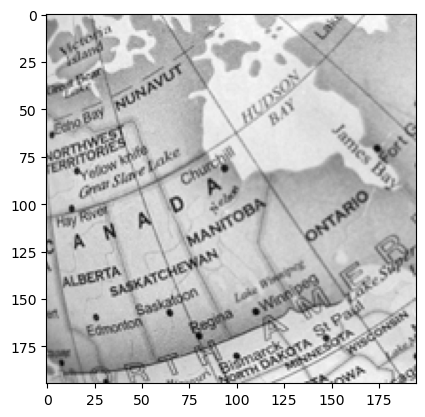

In [2]:
img_1 = plt.imread("Globe.png")
plt.imshow(img_1,cmap='gray');

In [3]:
img_1.shape

(195, 195)

# 1. Space Varient Blurring
### $σ(m, n) = A e^{−\frac{(m −\frac{N}{2})^2+(n −\frac{N}{2})^2}{B}}$
* $ Given: σ(N/2, N/2) = 2 $<br><br>
$A e^{−\frac{(\frac{N}{2} −\frac{N}{2})^2+(\frac{N}{2} −\frac{N}{2})^2}{B}} = 2$ <br>
$=>A = 2$
* And also $Given: σ(0, 0) = 0.01 $<br><br>
$2e^{−\frac{(\frac{N}{2})^2+(\frac{N}{2})^2}{B}} = 0.01$<br>
$=> e^{−\frac{N^2}{2B}} = 0.005$<br>
$=>\frac{\frac{N}{2}^2}{B} = -ln(0.005)$ <br>
$ =>B = \frac{-N^2}{2ln(0.005)}$

In [4]:
A =2
B = -(img_1.shape[0])**2/(2*np.log(0.01/A))
print("A = {}\nB = {}".format(A,B))

A = 2
B = 3588.403390110064


In [5]:
def create_sigma_matrix(img,A,B):
    N,M = img.shape[0],img.shape[1]
    sigma_mat = np.zeros([N,M])
    for r in range(sigma_mat.shape[0]):
        for c in range(sigma_mat.shape[1]):
            sigma_mat[r][c] =A*np.exp(-((r-N//2)**2+(c-M//2)**2)/(B))
    return sigma_mat

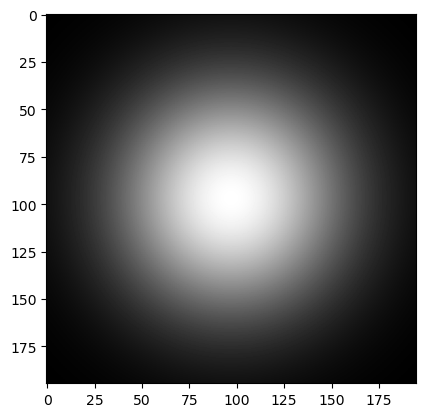

In [6]:
sigma_matrix = create_sigma_matrix(img_1,A,B)
plt.imshow(sigma_matrix,cmap='gray');

## Space Variant Gaussian Blurring 

In [7]:
def Space_Variant_Gaussian_Blurring(given_img,sigma):
    mo,no=int(np.ceil(6*sigma[0][0]+1)),int(np.ceil(6*sigma[0][0]+1))
    if mo%2==0:
        mo,no=mo+1,no+1
    tr,tc=given_img.shape[0],given_img.shape[1]
    Final_img = np.zeros([tr+mo-1,tc+no-1])
    
    for row in tqdm(range(tr)):
        for col in range(tc):
            m,n=int(np.ceil(6*sigma[row][col]+1)),int(np.ceil(6*sigma[row][col]+1))
            if m%2==0:
                m,n=m+1,n+1
            s = 0
            for r in range(m):
                for c in range(n):
                    s = s+(1/(2*np.pi*sigma[row][col]**2))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma[row][col]**2))
            for r in range(m):
                for c in range(n):
                    Final_img[row+mo//2+r-m//2][col+no//2+c-n//2] = Final_img[row+mo//2+r-m//2][col+no//2+c-n//2]+given_img[row][col]*(1/(2*np.pi*sigma[row][col]**2*s))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma[row][col]**2))
    return Final_img
    
    

100%|██████████| 195/195 [00:09<00:00, 20.32it/s]


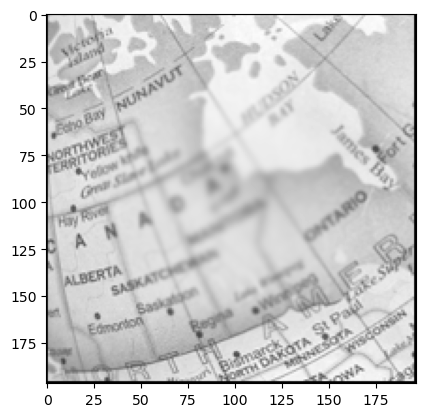

In [8]:
Fi = Space_Variant_Gaussian_Blurring(img_1,sigma_matrix)
plt.imshow(Fi,cmap='gray');

# 2. Blur Nautilus.pgm using

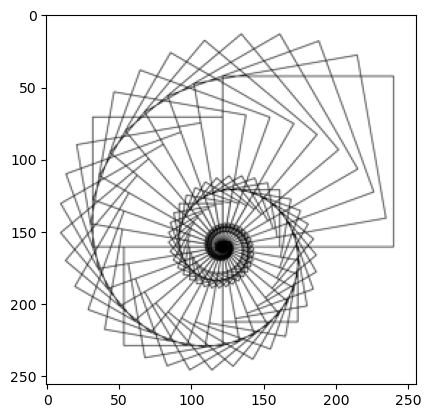

In [9]:
img_2 = plt.imread("Nautilus.png")
plt.imshow(img_2,cmap='gray');

## a. Space-Invariant Gaussian Blur with σ = 1.0

In [10]:
def Space_Invariant_Gaussian_Blurring(given_img,sigma):
    m,n=int(np.ceil(6*sigma+1)),int(np.ceil(6*sigma+1))
    tr,tc=given_img.shape[0],given_img.shape[1]
    Final_img = np.zeros([tr+m-1,tc+n-1])
    s = 0
    if(m!=1):
        for r in range(m):
            for c in range(n):
                s = s+(1/(2*np.pi*sigma**2))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2))
    for row in tqdm(range(tr)):
        for col in range(tc):
            if(m!=1):
                for r in range(m):
                    for c in range(n):
                        Final_img[row+m//2+r-m//2][col+n//2+c-n//2] = Final_img[row+m//2+r-m//2][col+n//2+c-n//2]+given_img[row][col]*(1/(2*np.pi*sigma**2*s))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2))
            else:
                Final_img[row][col] = Final_img[row][col]+given_img[row][col]
    return Final_img
    
    

100%|██████████| 256/256 [00:10<00:00, 23.82it/s]


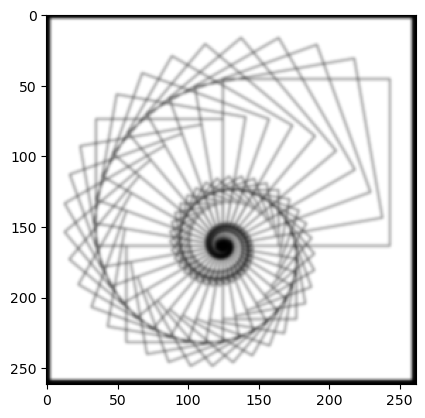

In [11]:
Fi_si = Space_Invariant_Gaussian_Blurring(img_2,sigma=1)
plt.imshow(Fi_si,cmap='gray');

## Space-Variant Gaussian Blur with σ(m, n) = 1.0 for 0 ≤ m, n ≤ N − 1.

100%|██████████| 256/256 [00:20<00:00, 12.53it/s]


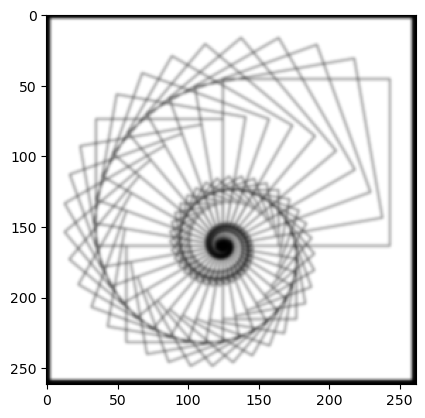

In [12]:
Fi_sv = Space_Variant_Gaussian_Blurring(img_2,sigma=np.ones([img_2.shape[0],img_2.shape[1]]))
plt.imshow(Fi_sv,cmap='gray');

## Verification of above two methods(2.a and 2.b)

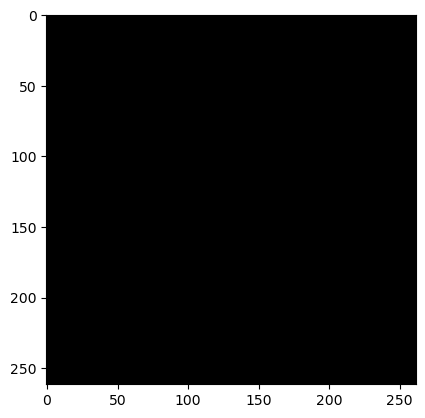

In [13]:
plt.imshow(Fi_sv-Fi_si,cmap='gray');

In [14]:
(Fi_sv-Fi_si).max()

0.0

We can see that the output images of space_invariant_gaussian_blurring and space_variant_gaussian_blurring are exactly same